<a href="https://colab.research.google.com/github/qkezz/imgProcLab3/blob/main/imgLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение
img = cv2.imread('as.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
img_gray.shape
np.min(img_gray) - np.max(img_gray)
'''СТРАТЕГИЯ: делаем серые полосы белыми как фон'''
plt.figure(figsize=(16, 10))


/tmp/ipython-input-115079292.py:2: RuntimeWarning: overflow encountered in scalar subtract
  np.min(img_gray) - np.max(img_gray)


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Исходное изображение

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

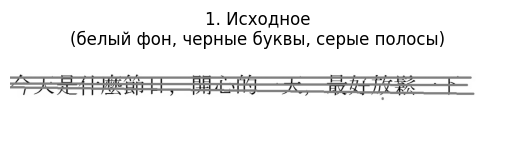

In [ ]:
plt.subplot(1, 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('1. Исходное\n(белый фон, черные буквы, серые полосы)')
plt.axis('off')


Анализируем гистограмму чтобы понять диапазон полос

Text(0, 0.5, 'Количество пикселей')

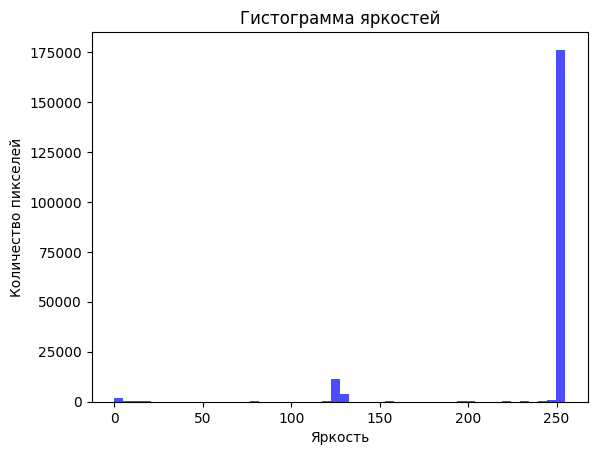

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(img_gray.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Гистограмма яркостей')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')

метод: заменяем серые пиксели на белые
Определяем диапазон серых полос (предположительно 100-200)

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

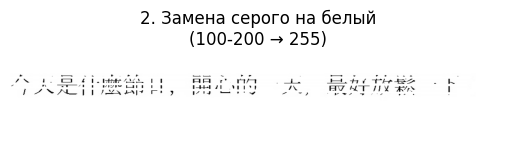

In [ ]:
gray_min, gray_max = 100, 200
img_no_stripes_simple = img_gray.copy()
img_no_stripes_simple[(img_gray >= gray_min) & (img_gray <= gray_max)] = 255

plt.subplot(1, 1, 1)
plt.imshow(img_no_stripes_simple, cmap='gray')
plt.title('2. Замена серого на белый\n(100-200 → 255)')
plt.axis('off')

Более умный метод: определяем полосы автоматически
###Ищем горизонтальные линии (полосы)

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

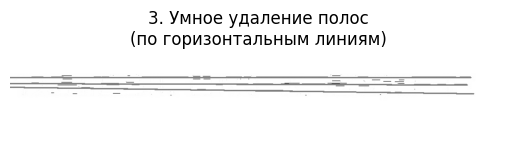

In [ ]:
edges = cv2.Canny(img_gray, 50, 150)
# Увеличиваем горизонтальные линии
kernel_horizontal = np.ones((1, 15), np.uint8)
stripes_mask = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_horizontal)

'''Заменяем области полос на белый'''
img_no_stripes_smart = img_gray.copy()
img_no_stripes_smart[stripes_mask > 0] = 255

plt.subplot(1, 1, 1)
plt.imshow(img_no_stripes_smart, cmap='gray')
plt.title('3. Умное удаление полос\n(по горизонтальным линиям)')
plt.axis('off')


Пороговая обработка: все что не черное - делаем белым



(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

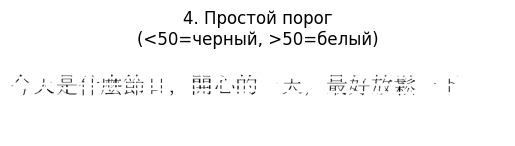

In [ ]:
_, img_binary_clean = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
plt.subplot(1, 1, 1)
plt.imshow(img_binary_clean, cmap='gray')
plt.title('4. Простой порог\n(<50=черный, >50=белый)')
plt.axis('off')


Адаптивная бинаризация на исходном изображении

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

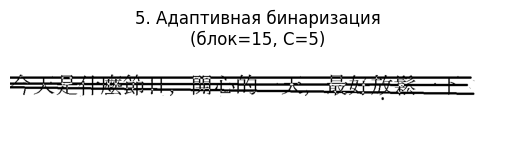

In [ ]:
img_adaptive = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 15, 5
)
plt.subplot(1, 1, 1)
plt.imshow(img_adaptive, cmap='gray')
plt.title('5. Адаптивная бинаризация\n(блок=15, C=5)')
plt.axis('off')

Комбинация: убираем полосы + адаптивная бинаризация

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

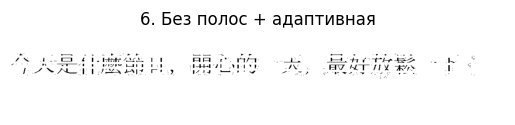

In [ ]:
img_combo = cv2.adaptiveThreshold(
    img_no_stripes_simple, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 3
)
plt.subplot(1, 1, 1)
plt.imshow(img_combo, cmap='gray')
plt.title('6. Без полос + адаптивная')
plt.axis('off')


Увеличение контраста перед обработкой

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

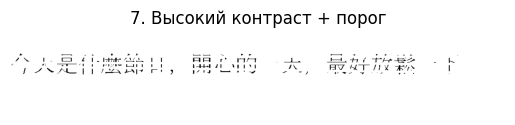

In [ ]:
img_high_contrast = cv2.convertScaleAbs(img_gray, alpha=2.0, beta=0)
_, img_contrast_binary = cv2.threshold(img_high_contrast, 100, 255, cv2.THRESH_BINARY)
plt.subplot(1, 1, 1)
plt.imshow(img_contrast_binary, cmap='gray')
plt.title('7. Высокий контраст + порог')
plt.axis('off')


Морфология для очистки текста

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

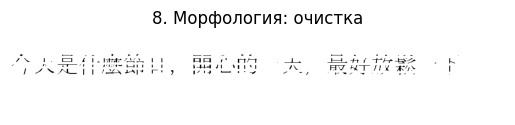

In [ ]:
kernel_clean = np.ones((2,2), np.uint8)
img_morph = cv2.morphologyEx(img_binary_clean, cv2.MORPH_OPEN, kernel_clean)
plt.subplot(1, 1, 1)
plt.imshow(img_morph, cmap='gray')
plt.title('8. Морфология: очистка')
plt.axis('off')


Увеличение размера для переводчика

(np.float64(-0.5), np.float64(3251.5), np.float64(545.5), np.float64(-0.5))

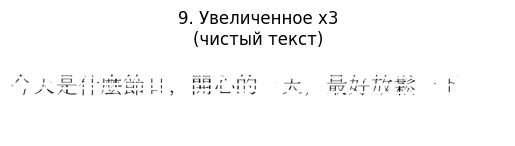

In [ ]:
scale = 3
height, width = img_binary_clean.shape
img_large = cv2.resize(img_binary_clean, (width * scale, height * scale),
                      interpolation=cv2.INTER_NEAREST)
plt.subplot(1, 1, 1)
plt.imshow(img_large, cmap='gray')
plt.title(f'9. Увеличенное x{scale}\n(чистый текст)')
plt.axis('off')


Инверсия (черный текст на белом фоне)

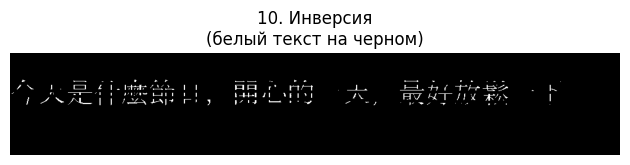

In [ ]:
img_inverted = 255 - img_binary_clean
plt.subplot(1, 1, 1)
plt.imshow(img_inverted, cmap='gray')
plt.title('10. Инверсия\n(белый текст на черном)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
results = {
    "01_no_stripes_simple.jpg": img_no_stripes_simple,
    "02_no_stripes_smart.jpg": img_no_stripes_smart,
    "03_binary_clean.jpg": img_binary_clean,
    "04_adaptive.jpg": img_adaptive,
    "05_combo_no_stripes_adaptive.jpg": img_combo,
    "06_high_contrast_binary.jpg": img_contrast_binary,
    "07_morph_clean.jpg": img_morph,
    "08_large_x3_clean.jpg": img_large,
    "09_inverted.jpg": img_inverted
}

for filename, image in results.items():
    cv2.imwrite(filename, image)
    print(f"Сохранено: {filename}")

Сохранено: 01_no_stripes_simple.jpg
Сохранено: 02_no_stripes_smart.jpg
Сохранено: 03_binary_clean.jpg
Сохранено: 04_adaptive.jpg
Сохранено: 05_combo_no_stripes_adaptive.jpg
Сохранено: 06_high_contrast_binary.jpg
Сохранено: 07_morph_clean.jpg
Сохранено: 08_large_x3_clean.jpg
Сохранено: 09_inverted.jpg
